# Tutorial of implementing Deep learning model by OOP
- **Ch1. Object Oriented Programming**  
파이썬으로 객체지향 프로그래밍을 하는 방법에 대하 더 자세한 사항을 확인하려면 아래를 링크를 참고
    - 점프투파이썬(Class) : https://wikidocs.net/28  
  
  
- **Ch2. Example : Deep Neural Network for MNIST dataset**  
Class를 활용하여 5개의 hidden layer를 가지는 DNN 모형을 구성하는 예제

## Ch1. Object Oriented Programming (OOP)
* 클래스(class) : 똑같은 무엇인가를 계속해서 만들어낼 수 있는 설계 도면 (과자틀)
* 객체(object) : 과자틀에 의해서 만들어진 과자들

### Class

In [1]:
class Programmer:
    pass
kim = Programmer()
park = Programmer()

### Class variable
객체(object)간 서로 공유되는 변수로 보통 클래스(class)에 의해 생성되는 객체들이 공통적으로 사용할 목적으로 쓰임

In [2]:
class ToBigs:
    name = 'ToBigs'

In [3]:
tobigs = ToBigs()
tobigs.name

'ToBigs'

In [4]:
ToBigs.name = '투빅스'

In [5]:
tobigs.name

'투빅스'

### Method
클래스(class) 내부의 함수로 "파이썬은 객체를 통해 클래스의 함수를 호출할 때, 호출한 객체 자신이 호출한 클래스 함수의 첫번째 입력 인수로 전달된다."

In [6]:
class ToBigs:
    name = 'ToBigs'
    def add_member(self, name):
        member_name = name
        return '동아리 : {}, 회원이름 : {}'.format(self.name, member_name)

In [7]:
# 객체에서 Method를 호출할 때
tobigs = ToBigs()
tobigs.add_member('김보섭')

'동아리 : ToBigs, 회원이름 : 김보섭'

In [8]:
# 클래스에서 Method를 호출할 때, 잘 사용되지 않는 방법임
ToBigs.add_member(tobigs, '김보섭')

'동아리 : ToBigs, 회원이름 : 김보섭'

### Object variable
객체 변수(Object variable)은 객체별로 고유한 값이 저장되는 변수이다. 반면에 클래스 변수(Class variable)은 객체간 서로 공유되는 변수

In [9]:
class ToBigs:
    name = 'ToBigs'
    def make_list(self):
        self.member = []
    def add_member(self, member_name):
        self.member.append(member_name)
        print('{}을 {}에 추가하였습니다.'.format(member_name, self.name))

In [10]:
first_members = ToBigs()

In [11]:
first_members.make_list()

In [12]:
first_members.add_member('김보섭')

김보섭을 ToBigs에 추가하였습니다.


### __init__ Method
객체를 만들 때, 항상 실행되는 메서드

In [13]:
class ToBigs:
    name = 'ToBigs'
    def __init__(self):
        self.make_list()
        
    def make_list(self):
        self.member = []
    
    def add_member(self, member_name):
        self.member.append(member_name)
        print('{}을 {}에 추가하였습니다.'.format(member_name, self.name))

In [14]:
first_members = ToBigs()
first_members.add_member('김보섭')

김보섭을 ToBigs에 추가하였습니다.


In [15]:
class ToBigs:
    name = 'ToBigs'
    def __init__(self):
        self.member = []
    
    def add_member(self, member_name):
        self.member.append(member_name)
        print('{}을 {}에 추가하였습니다.'.format(member_name, self.name))

In [16]:
first_members = ToBigs()
first_members.add_member('이경택')
first_members.add_member('김강진')
first_members.add_member('김보섭')
first_members.add_member('김윤진')
first_members.add_member('김현주')

이경택을 ToBigs에 추가하였습니다.
김강진을 ToBigs에 추가하였습니다.
김보섭을 ToBigs에 추가하였습니다.
김윤진을 ToBigs에 추가하였습니다.
김현주을 ToBigs에 추가하였습니다.


In [17]:
first_members.member

['이경택', '김강진', '김보섭', '김윤진', '김현주']

### Python coding convention
변수명에서 *_* 은 위치에 따라 다음과 같은 의미가 있다. 더 자세한 사항은 아래의 링크를 참고  
  
* **_single_leading_underscore** : 내부적으로 사용되는 변수
* **single_trailing_underscore_** : 파이썬 기본 키워드와 충돌을 피하려고 사용

링크 : https://spoqa.github.io/2012/08/03/about-python-coding-convention.html  




In [18]:
class ToBigs:
    name = 'ToBigs'
    def __init__(self):
        self.member = []
        self._comment = '저는 여러분들을 잘 모릅니다. 이 멘트는 객체변수이고 접근할 순 있지만, 자동완성 기능 사용시 추천에 안뜹니다.'
    
    def add_member(self, member_name):
        self.member.append(member_name)
        print('{}을 {}에 추가하였습니다.'.format(member_name, self.name))

In [19]:
first_members = ToBigs()

In [20]:
first_members._comment

'저는 여러분들을 잘 모릅니다. 이 멘트는 객체변수이고 접근할 순 있지만, 자동완성 기능 사용시 추천에 안뜹니다.'

## Ch2. Example : Deep Neural Network for MNIST
모형을 생성하는 클래스는 우리가 최소로 필요로 하는 기능인 그래프 생성, 모형이 주로 하는 일인 predict만 Model Class의 Method로 구현한다. 실제 Training과 loss를 평가하는 evaluate는 Solver Class의 Method로 구현한다. 위에 언급한 내용을 반영하는 Deep Neural Network 모형을 만들어서 MNIST에 적용

* **Model Class *(class DNNClassifier)*** 
    * Model을 생성하는 Method가 필요, 기왕이면 객체를 생성할 때, Deep Learning 모형이 바로 생성되면 좋다. ***(init 메서드)***
    * Model을 생성할 때, 모든 layer에 대해서 공통으로 적용되는 것은 ***init 메서드***의 input으로 받는다. (eg. activation, weight initialization 방법)
    * 특정 데이터가 주어졌을 때, 결과를 예측하는 Method가 필요 ***(predict 메서드)***
      
      
* **Solver Class *(class Solver)*** 
    * Model Class의 instance와 어떤 Optimizer를 쓸 것인지를 input으로 받아 instance를 생성한다. ***(init 메서드)***
    * Optimizer가 training 할 때, learning rate를 메서드의 input으로 받아 조절할 수 있어야한다. ***(train 메서드)***
    * loss를 계산한다. ***(evaluate 메서드)***

###  Setup

In [21]:
import os, sys
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data # load mnist dataset
mnist = input_data.read_data_sets(train_dir = './MNIST_data', one_hot = True, reshape = True, seed = 777)

Extracting ./MNIST_data\train-images-idx3-ubyte.gz
Extracting ./MNIST_data\train-labels-idx1-ubyte.gz
Extracting ./MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data\t10k-labels-idx1-ubyte.gz


### Define DNNClassifier Class

In [22]:
class DnnClassifier:
    def __init__(self, sess, n_features, n_class, hidden_dims = [100, 100, 100, 100, 100],
               activation_fn = tf.nn.relu, initializer = tf.contrib.layers.xavier_initializer()):
        self._sess = sess
        
        with tf.variable_scope('input_layer'):
            self._x = tf.placeholder(dtype = tf.float32, shape = [None, n_features])
            self._y = tf.placeholder(dtype = tf.float32, shape = [None, n_class])
                
        _net = self._x
            
        for layer, h_dim in enumerate(hidden_dims):
            with tf.variable_scope('hidden_layer{}'.format(layer + 1)):
                _net = tf.layers.dense(inputs = _net, units = h_dim, activation = activation_fn, kernel_initializer = initializer)
                    
        with tf.variable_scope('output_layer'):
            self._score = tf.layers.dense(inputs = _net, units = n_class, kernel_initializer = tf.contrib.layers.xavier_initializer())
                
        with tf.variable_scope('loss'):
            self._ce_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = self._y, logits = self._score))
                
        with tf.variable_scope('predict'):
            self._prediction = tf.argmax(input = self._score, axis = -1)
                
    def predict(self, x_data):
        feed_predict = {self._x : x_data}
        return self._sess.run(fetches = self._prediction, feed_dict = feed_predict)                        

### Define Solver Class

In [23]:
class Solver:
    def __init__(self, sess, model, optimizer = tf.train.AdamOptimizer):
        self._sess = sess
        self._model = model # DnnClassifier의 class의 instance를 input으로 받는다
        self._lr = tf.placeholder(dtype = tf.float32)
        self._optimizer = optimizer(self._lr)
        self._training_op = self._optimizer.minimize(self._model._ce_loss)
            
    def train(self, x_data, y_data, lr):
        feed_train = {self._model._x : x_data,
                      self._model._y : y_data,
                      self._lr : lr}
        return self._sess.run(fetches = [self._training_op, self._model._ce_loss], feed_dict = feed_train)
    
    def loss(self, x_data, y_data):
        feed_loss = {self._model._x : x_data, self._model._y : y_data}
        return self._sess.run(fetches = self._model._ce_loss, feed_dict = feed_loss)        

### Training

In [24]:
# hyperparameter setting
epochs = 2
batch_size = 100
tr_loss_history = []
val_loss_history = []

sess = tf.Session()
dnn_model = DnnClassifier(sess = sess, n_features = 784, n_class = 10)
adam_solver = Solver(sess = sess, model = dnn_model, optimizer = tf.train.AdamOptimizer)

In [25]:
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    total_batch = int(mnist.train.images.shape[0])
    avg_tr_loss = 0
    avg_val_loss = 0
    
    for step in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size = batch_size)
        val_xs, val_ys = mnist.train.next_batch(batch_size = batch_size)
        _, tr_loss = adam_solver.train(x_data = batch_xs, y_data = batch_ys, lr = 1e-3)
        val_loss = adam_solver.loss(x_data = val_xs, y_data = val_ys)
        
        avg_tr_loss += tr_loss / total_batch
        avg_val_loss += val_loss / total_batch
        
        if step % 5000 == 0:
            print('step :{:3}, tr_loss : {:.3f}, val_loss : {:.3f}'.format(step, tr_loss, val_loss))
            
    print('epoch :{:3}, tr_loss : {:.3f}, val_loss : {:.3f}'.format(epoch, avg_tr_loss, avg_val_loss))
    tr_loss_history.append(avg_tr_loss)
    val_loss_history.append(avg_val_loss)

step :  0, tr_loss : 2.309, val_loss : 2.290
step :5000, tr_loss : 0.021, val_loss : 0.004
step :10000, tr_loss : 0.003, val_loss : 0.024
step :15000, tr_loss : 0.021, val_loss : 0.009
step :20000, tr_loss : 0.027, val_loss : 0.000
step :25000, tr_loss : 0.000, val_loss : 0.000
step :30000, tr_loss : 0.002, val_loss : 0.001
step :35000, tr_loss : 0.000, val_loss : 0.000
step :40000, tr_loss : 0.000, val_loss : 0.000
step :45000, tr_loss : 0.000, val_loss : 0.000
step :50000, tr_loss : 0.001, val_loss : 0.000
epoch :  0, tr_loss : 0.016, val_loss : 0.016
step :  0, tr_loss : 0.000, val_loss : 0.000
step :5000, tr_loss : 0.000, val_loss : 0.000
step :10000, tr_loss : 0.000, val_loss : 0.023
step :15000, tr_loss : 0.005, val_loss : 0.000
step :20000, tr_loss : 0.000, val_loss : 0.028
step :25000, tr_loss : 0.009, val_loss : 0.003
step :30000, tr_loss : 0.002, val_loss : 0.000
step :35000, tr_loss : 0.000, val_loss : 0.000
step :40000, tr_loss : 0.000, val_loss : 0.000
step :45000, tr_loss

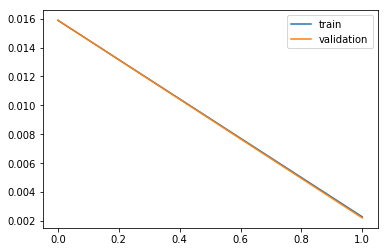

In [26]:
plt.plot(tr_loss_history, label = 'train')
plt.plot(val_loss_history, label = 'validation')
plt.legend()

In [27]:
acc = np.mean(np.argmax(mnist.test.labels, axis = 1) == dnn_model.predict(x_data = mnist.test.images))
print('test accuracy : {:.2%}'.format(acc))

test accuracy : 98.27%
